In [1]:
import os
import numpy as np
import pandas as pd
import csv

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(context="paper", font_scale=1.5, rc={"lines.linewidth": 2}, font='DejaVu Serif')
#import bottleneck as bn

In [2]:
def loadFilesNamePath(directorRoot: str):
    l_files_name_path = []
    for path, subdirs, files in os.walk(directorRoot):
        for name in files:
            l_files_name_path.append(os.path.join(path, name))
    return l_files_name_path

In [3]:
def loadFile(file_name):
    with open(file_name, 'r') as f:
        file_data = f.read()
        f.close()
    return file_data.splitlines()

In [4]:
"""
========
Function Generating Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
def barCharGenerator(groupListData: list, ListLabel: list, groupListLegend: list
                     , ylabel: str, xlabel: str, title: str, figSize=(15, 9)):
    N = 4
    ind = np.arange(N)  # the x locations for the groups
    width = 0.12       # the width of the bars
    std_CoFactor = [0.01, 0.01, 0.01, 0.01]
    std_1 = [0.02, 0.02, 0.02, 0.02]
    std_2 = [0.01, 0.01, 0.01, 0.01]
    std_3 = [0.02, 0.02, 0.02, 0.02]
    std_4 = [0.01, 0.01, 0.01, 0.01]
    std_5 = [0.01, 0.01, 0.01, 0.01]
    
    #Zerando os pausinhos em cima das barras
    std_CoFactor = std_1 = std_2 = std_3 = std_4 = std_5 = [0,0,0,0]
    
    CoFactor = groupListData[0]
    Other_1 = groupListData[1]
    Other_2 = groupListData[2]
    Other_3 = groupListData[3]
    Other_4 = groupListData[4]
    Other_5 = groupListData[5]

    #Define Plot
    fig, ax = plt.subplots(figsize=figSize)

    rects1 = ax.bar(ind, CoFactor, width, color='yellow', yerr=std_CoFactor)
    rects2 = ax.bar(ind + width, Other_1, width, color='olive', yerr=std_1)
    rects3 = ax.bar(ind + width*2, Other_2, width, color='darkkhaki', yerr=std_2)
    rects4 = ax.bar(ind + width*3, Other_3, width, color='darkseagreen', yerr=std_3)
    rects5 = ax.bar(ind + width*4, Other_4, width, color='lightgreen', yerr=std_4)
    rects6 = ax.bar(ind + width*5, Other_5, width, color='darkolivegreen', yerr=std_5)

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(ind + (width*5) / 2)
    ax.set_xticklabels(ListLabel)

    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]) , groupListLegend)
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 0.01))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

    def autolabel(rects, mult_height):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., mult_height*height,
                    '%2.4f' % float(height),
                    ha='center', va='bottom')

    '''autolabel(rects1, 1.05)
    autolabel(rects2, 1.13)
    autolabel(rects3, 1.05)
    autolabel(rects4, 1.13)
    autolabel(rects5, 1.05)
    autolabel(rects6, 1.13)'''

    plt.show()

In [5]:
def prepraraFiles(list_file_name: list, file_path: str):    
    CoFactor_dic = {'Recall@10':0.1640,'Recall@20':0.1611, 'Recall@50':0.1842, 'Recall@100': 0.2381
                            , 'NDCG@10': 0.1675, 'NDCG@20': 0.1601, 'NDCG@50': 0.1615, 'NDCG@100': 0.1803
                            , 'MAP@10': 0.0965, 'MAP@20': 0.0780, 'MAP@50': 0.0625, 'MAP@100': 0.0593}
    file_dic = {}

    for f_name in list_file_name:
        file_name = f_name.split('_')
        key_name = str.capitalize(file_name[0])+'_'+str.capitalize(file_name[1])+'_'+file_name[2]+'%'
        list_file_content = loadFile(file_path+f_name)
        list_file_content = list(filter(None, list_file_content))
        data_dic = {}

        for line in list_file_content:
            idx = list_file_content.index(line)
            line = line.replace('Test ','').replace(' ','').split(':')
            data_dic[line[0]]=float(line[1])

        file_dic[key_name]=data_dic
    return CoFactor_dic, file_dic

In [6]:
def startCoFactorValues(CoFactor_dic: dict):
    #Determinando Cofactor Dados
    listDataNdcgCoFactor = []
    listDataRecallCoFactor = []
    listDataMapCoFactor = []
    control = 0
    
    for key, value in CoFactor_dic.items():
        control = control+1
        #Armazena Recall
        if (control in np.arange(1,5)):
            listDataRecallCoFactor.append(value)
        #Armazena NDCG
        elif (control in np.arange(5,9)):
            listDataNdcgCoFactor.append(value)
        #Armazena MAP
        elif (control in np.arange(9,13)):
            listDataMapCoFactor.append(value)

    return listDataNdcgCoFactor, listDataMapCoFactor, listDataRecallCoFactor

In [7]:
def geraGraficos(Cofactor_dic: dict, file_dic: dict, firstGroupFile: bool ):
    groupListDataNDCG = []
    groupListDataRECALL = []
    groupListDataMAP = []
    listLabel = []

    ndcg_coFactor, mapCofactor, recall_coFactor = startCoFactorValues(CoFactor_dic)

    groupListDataMAP.append(mapCofactor)
    groupListDataNDCG.append(ndcg_coFactor)
    groupListDataRECALL.append(recall_coFactor)
    listLabel.append('CoFactor')

    #Parametros de controle
    control = 0
    contador = 0


    for key_title, value_list in file_dic.items():
        cnn_name = key_title.split('_')
        listLabel.append(key_title)

        listDataNdcg = []
        listDataRecall = []
        listDataMap = []

        for key_name, value in value_list.items():
            control = control+1

            #Armazena Recall
            if (control in np.arange(1,5)):
                listDataRecall.append(value)
            #Armazena NDCG
            elif (control in np.arange(5,9)):
                listDataNdcg.append(value)
            #Armazena MAP
            elif (control in np.arange(9,13)):
                listDataMap.append(value)

        groupListDataNDCG.append(listDataNdcg)
        groupListDataMAP.append(listDataMap)
        groupListDataRECALL.append(listDataRecall)

        control = 0

        contador = contador + 1
        if contador == 5:
            contador = 0

            barCharGenerator(groupListDataRECALL, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','Recall@k', 'Comparação CoFactor Vs '+cnn_name[0])
            
            print('Recall Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)
            
            print('\n\n')    
            barCharGenerator(groupListDataNDCG, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','NDCG@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('NDCG Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            print('\n\n')    
            barCharGenerator(groupListDataMAP, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','MAP@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('MAP Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            groupListDataNDCG.clear()
            groupListDataRECALL.clear()
            groupListDataMAP.clear()
            listLabel.clear()

            groupListDataMAP.append(mapCofactor)
            groupListDataNDCG.append(ndcg_coFactor)
            groupListDataRECALL.append(recall_coFactor)
            listLabel.append('CoFactor')

In [10]:
file_path = 'vae_inv_n_norm/overload_sum/'

### Definição dos Dados - Descritivo

Os valores apresentados abaixo nos gráficos, correspondem aos resultados obtidos do Algoritmo CoFactor. A Barra amarela correponde a entrada padrão dos dados, no qual o algoritmo trabalha com a co-ocorrência de itens. As demais barras correpondem a entrada gerada atráves do procedimento a ser descrito abaixo.

#### Redes Neurais Convolutivas

O dataset de imagens (ml20m) foi aplicado a quatro redes neurais convolutivas para extração de suas features. Foram elas Resnet50, Vgg16, Vgg19 e Xception. Uma vez que essas features foram extraídas, uma segunda feature foi extraída de informações textuais do mesmo dataset utilizando uma rede neural chamada Doc2vec. 

Cada feature extraídas da imagens foram concatenadas com a feature de informações textuais, gerando um novo vetor de features.
- Resnet50+Doc2Vec / Vgg16+Doc2Vec / Vgg19+Doc2Vec / Xception+Doc2Vec

#### AutoEnconder's

Cada vetor de features "concatenado" foi aplicado a um tipo de AutoEnconder com o objetivo de gerar uma nova representação do vetor de features original. Os autoencoder's utilizados foram Sparse AutoEncoder, Convolutional AutoEnconder (CAE) e Varitional AutoEncoder (VAE).

As representações geradas do vetor de featuares concatenado, após aplicadas nos autoencoder's foram:

10% - Uma representação com 10% do tamanho do vetor original

20% - Uma representação com 20% do tamanho do vetor original

30% - Uma representação com 30% do tamanho do vetor original

40% - Uma representação com 40% do tamanho do vetor original

50% - Uma representação com 50% do tamanho do vetor original

60% - Uma representação com 60% do tamanho do vetor original

70% - Uma representação com 70% do tamanho do vetor original

80% - Uma representação com 80% do tamanho do vetor original

90% - Uma representação com 90% do tamanho do vetor original

100% - Uma representação com 100% do tamanho do vetor original


### Matriz de Similaridade

Foi gerado uma matrix de similaridade entre os vetores de características (vetor final gerado a partir do AutoEncoder) utilizando o método da "Distância Euclideana". Para os resultados apresentados nesse documento foi utilizado uma "Distância Euclideana Invertida Não Normalizada", ou seja, valores muito proxímos de zero (ou zero) corresponde a vetores que não possuem similaridade nenhum, em contrapartida quanto maior for o valor maior é a similaridade entre os itens.

Obs: O maior valor encontrado na matriz de similaridade corresponde a similaridade do vetor com ele mesmo.

### Metricas de Avaliação
Medidas de avaliação (ranked-based) foram utilizadas para medir o desempenho da recomendação do algoritmo ao mudar seu dataset de entrada em comparação com o dataset original proposto (co-ocorrência).

Para cada usuário, todas as métricas comparam a classficação prevista de itens "não observados" com sua classificação real. As medidas utilizadas foram Recall, NDCG e Map.

Nos resultados apresentados nos gráficos que seguem, foram considerados nos experimentos um "ranked list" de tamanhos fixados em: 10, 20, 50 e 100, para cada medida de avaliação, por exemplo, NDCG@20 significado que foi considerado um ranked list dos 20 itens no topo da lista.


### Análise Geral
Nós Gráficos apresentados nesse documento que estão relacionados ao AutoEncoder "VAE" o comportamento quanto a variação do @k para as métricas utilizadas é o mesmo observado no AutoEncoder "CAE", há uma crescente no desempenho para metrica Recall, NDCG mantém valores similares somente tendo uma crescente para @k igual a 100 e a métrica MAP mostrando uma decrescimento de desempenho do algoritmo conforme o valor de @k cresce.

No geral os resultados obtidos pelo algoritmo quando utilizado as matrizes de representação geradas pelo AutoEncoder VAE foi pior do que os resultados encontrados por "CAE e Sparse".

Aqui também chama bastante atenção o fato de que as representações de matrizes com menor percentual (10%, 20% e 30%) tiveram resultados muito ruins comparadas com os resultados das outras representações. O algoritmo convergiu rapidamente durante o treinamento para as matrizes de pequenas representações o que demostrou que ele foi muito bem no treino, entretanto, nos testes seu desempenho deixou muito a desejar.


Em todas as Comparações o BaseLine (CoFactor) utilizado apresentou melhor resultado do que as representações propostas do vetor original.

## Gráficos CoFactor Vs Rede Neural Resnet50

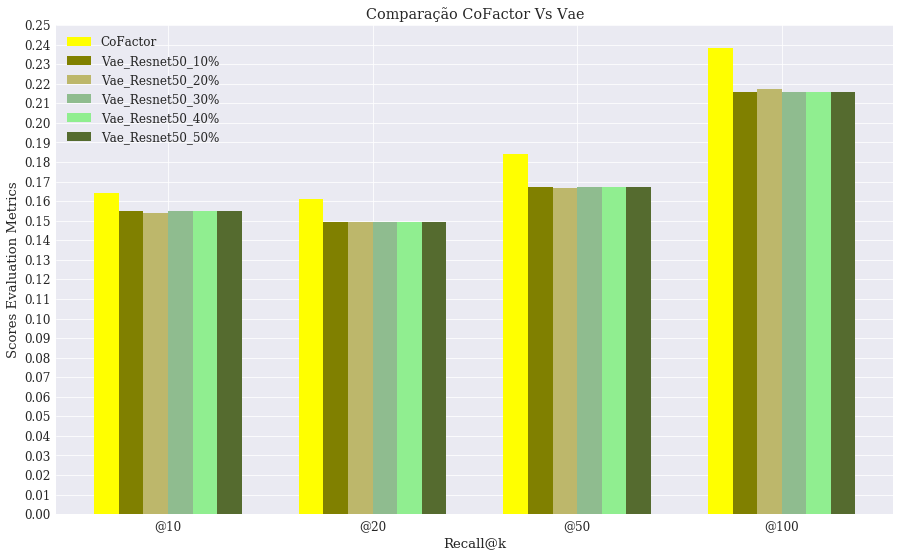

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1549  0.1495  0.1671  0.2158
20%       0.1537  0.1494  0.1669  0.2172
30%       0.1549  0.1494  0.1671  0.2159
40%       0.1548  0.1494  0.1672  0.2158
50%       0.1550  0.1495  0.1673  0.2157





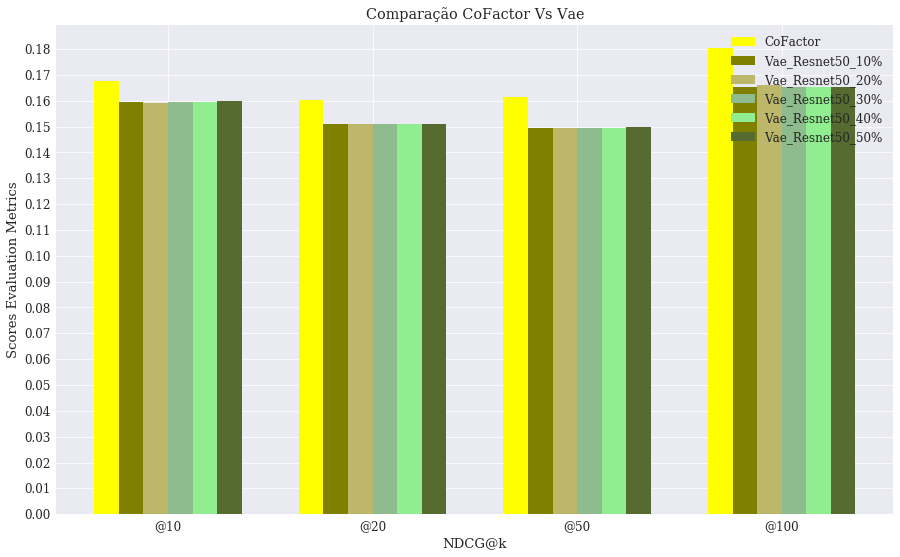

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1594  0.1508  0.1494  0.1654
20%       0.1593  0.1510  0.1493  0.1659
30%       0.1594  0.1508  0.1494  0.1654
40%       0.1594  0.1510  0.1495  0.1655
50%       0.1597  0.1511  0.1497  0.1655





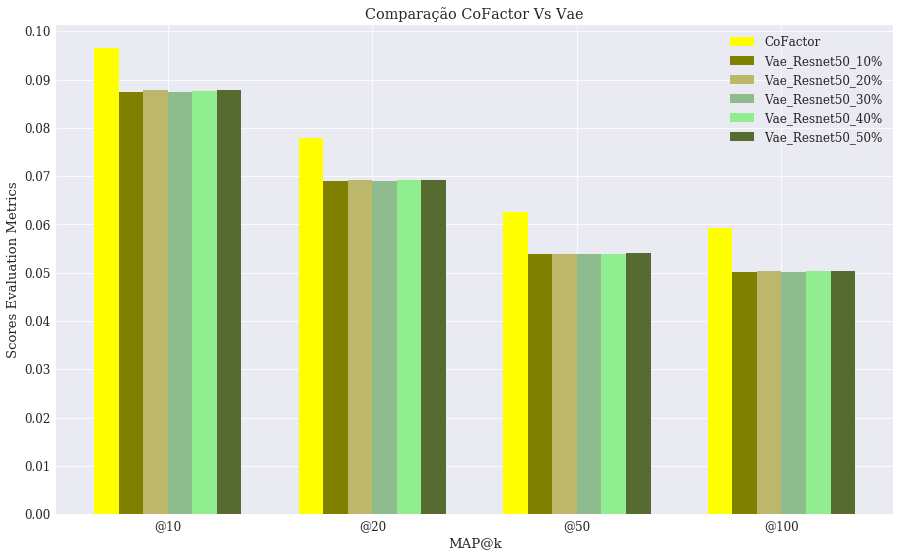

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0875  0.0691  0.0538  0.0501
20%       0.0878  0.0693  0.0538  0.0503
30%       0.0875  0.0691  0.0538  0.0502
40%       0.0876  0.0692  0.0539  0.0503
50%       0.0879  0.0693  0.0540  0.0503


In [11]:
list_file_name = ['vae_resnet50_10_pct_rec_val'
                  , 'vae_resnet50_20_pct_rec_val'
                  , 'vae_resnet50_30_pct_rec_val'
                  , 'vae_resnet50_40_pct_rec_val'
                  , 'vae_resnet50_50_pct_rec_val']

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

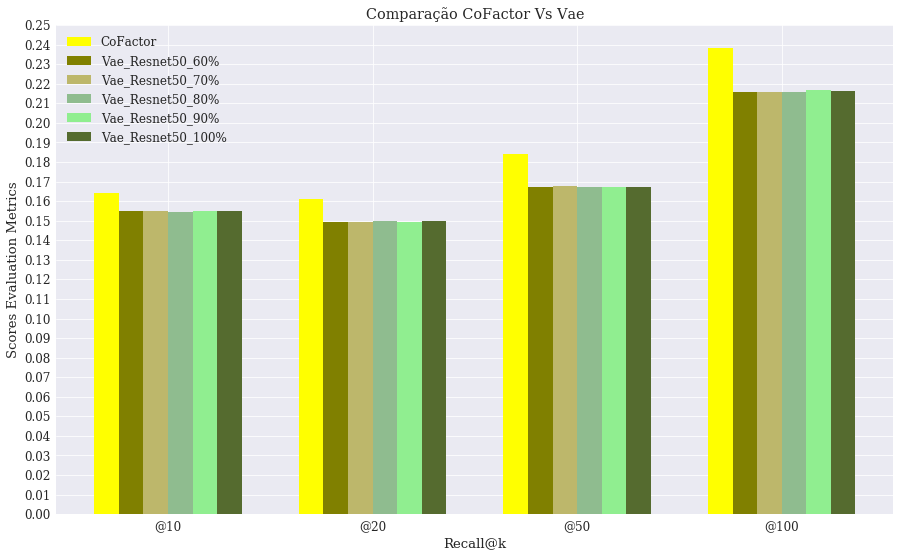

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1550  0.1494  0.1671  0.2156
70%       0.1548  0.1495  0.1675  0.2159
80%       0.1546  0.1498  0.1671  0.2160
90%       0.1548  0.1494  0.1671  0.2168
100%      0.1548  0.1497  0.1672  0.2161





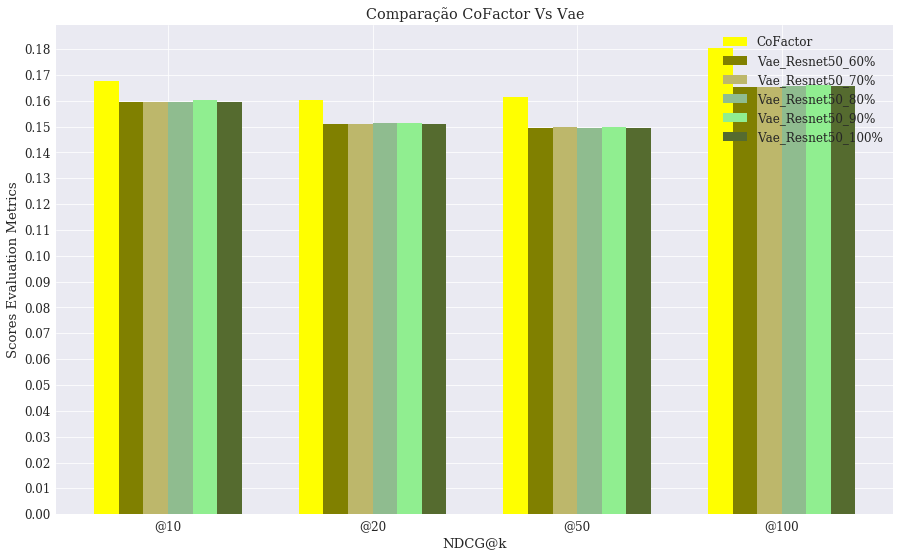

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1595  0.1509  0.1494  0.1653
70%       0.1595  0.1510  0.1497  0.1655
80%       0.1595  0.1512  0.1496  0.1656
90%       0.1603  0.1515  0.1498  0.1661
100%      0.1595  0.1511  0.1496  0.1656





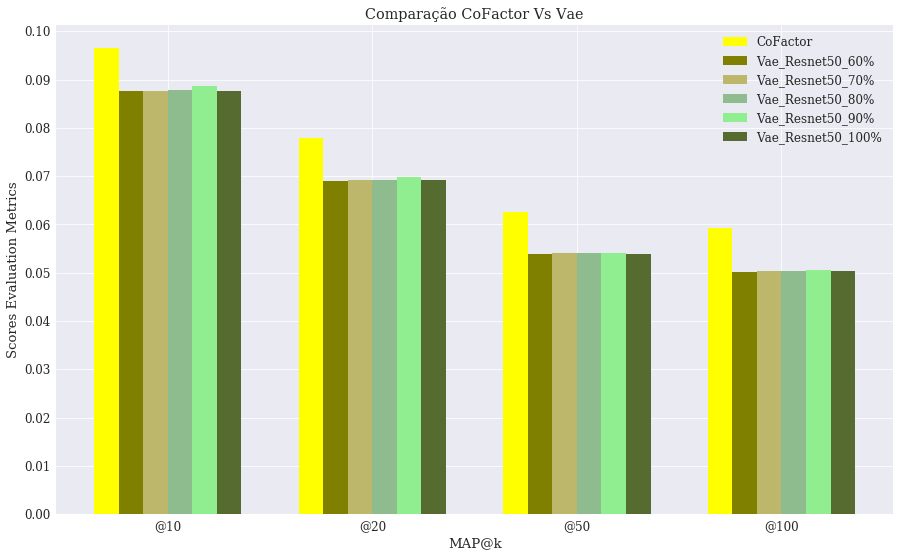

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0876  0.0691  0.0538  0.0502
70%       0.0877  0.0693  0.0540  0.0503
80%       0.0878  0.0693  0.0540  0.0503
90%       0.0887  0.0698  0.0541  0.0505
100%      0.0877  0.0692  0.0539  0.0503


In [12]:
list_file_name = ['vae_resnet50_60_pct_rec_val'
                  , 'vae_resnet50_70_pct_rec_val'
                  , 'vae_resnet50_80_pct_rec_val'
                  , 'vae_resnet50_90_pct_rec_val'
                  , 'vae_resnet50_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg16

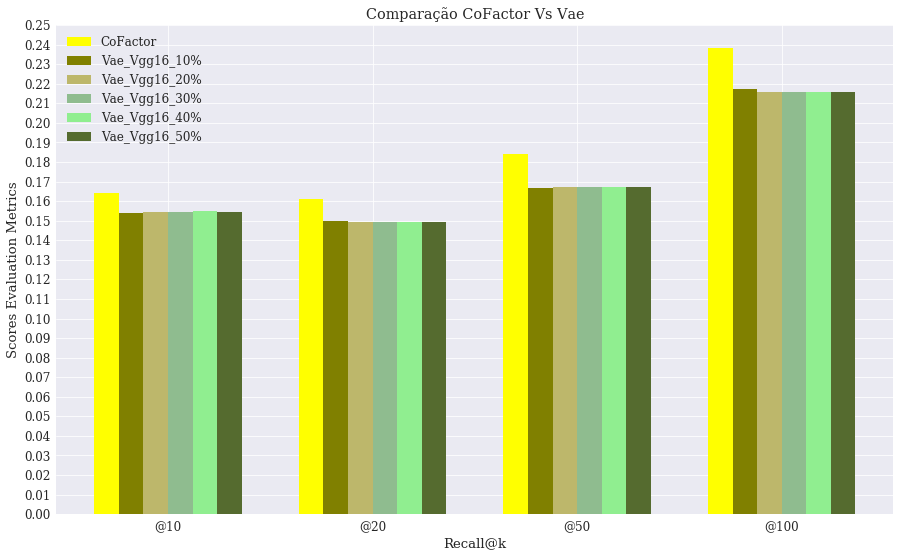

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1540  0.1498  0.1665  0.2172
20%       0.1546  0.1493  0.1671  0.2156
30%       0.1545  0.1493  0.1670  0.2157
40%       0.1549  0.1491  0.1672  0.2156
50%       0.1546  0.1492  0.1671  0.2156





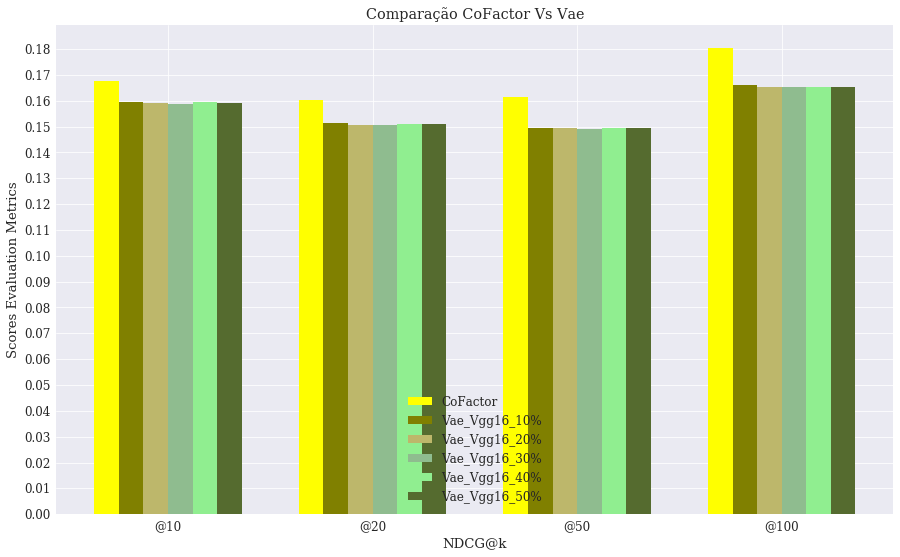

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1595  0.1514  0.1494  0.1660
20%       0.1591  0.1507  0.1494  0.1652
30%       0.1589  0.1506  0.1492  0.1652
40%       0.1595  0.1508  0.1495  0.1654
50%       0.1592  0.1508  0.1494  0.1653





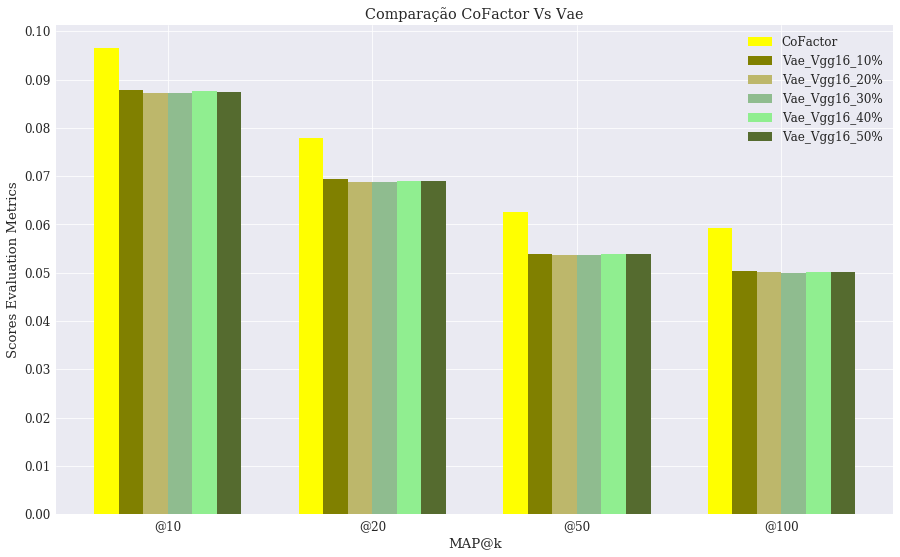

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0879  0.0694  0.0539  0.0504
20%       0.0873  0.0689  0.0537  0.0501
30%       0.0872  0.0689  0.0536  0.0500
40%       0.0877  0.0691  0.0539  0.0502
50%       0.0875  0.0690  0.0538  0.0501


In [13]:
list_file_name = ['vae_vgg16_10_pct_rec_val'
                  , 'vae_vgg16_20_pct_rec_val'
                  , 'vae_vgg16_30_pct_rec_val'
                  , 'vae_vgg16_40_pct_rec_val'
                  , 'vae_vgg16_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

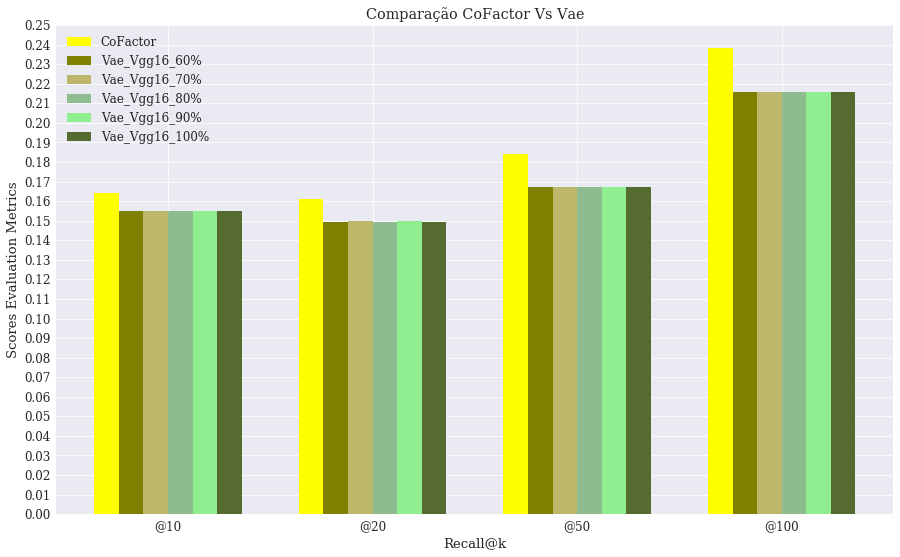

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1547  0.1494  0.1671  0.2156
70%       0.1548  0.1497  0.1670  0.2157
80%       0.1549  0.1495  0.1673  0.2158
90%       0.1547  0.1497  0.1670  0.2158
100%      0.1548  0.1494  0.1672  0.2159





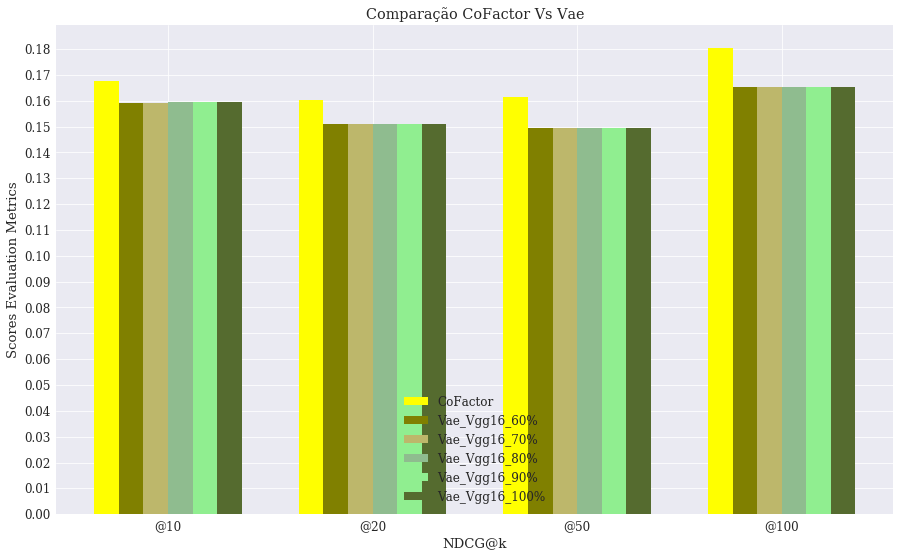

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1592  0.1508  0.1494  0.1653
70%       0.1593  0.1509  0.1494  0.1653
80%       0.1596  0.1510  0.1496  0.1654
90%       0.1594  0.1510  0.1495  0.1654
100%      0.1594  0.1508  0.1495  0.1655





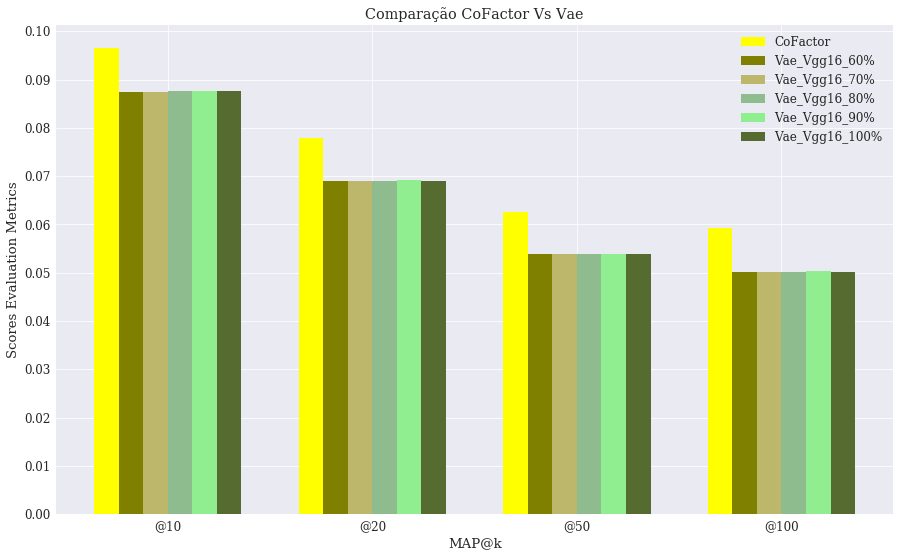

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0875  0.0691  0.0538  0.0502
70%       0.0875  0.0691  0.0538  0.0501
80%       0.0876  0.0691  0.0538  0.0502
90%       0.0877  0.0692  0.0539  0.0503
100%      0.0876  0.0691  0.0539  0.0502


In [14]:
list_file_name = ['vae_vgg16_60_pct_rec_val'
                  , 'vae_vgg16_70_pct_rec_val'
                  , 'vae_vgg16_80_pct_rec_val'
                  , 'vae_vgg16_90_pct_rec_val'
                  ,'vae_vgg16_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg19

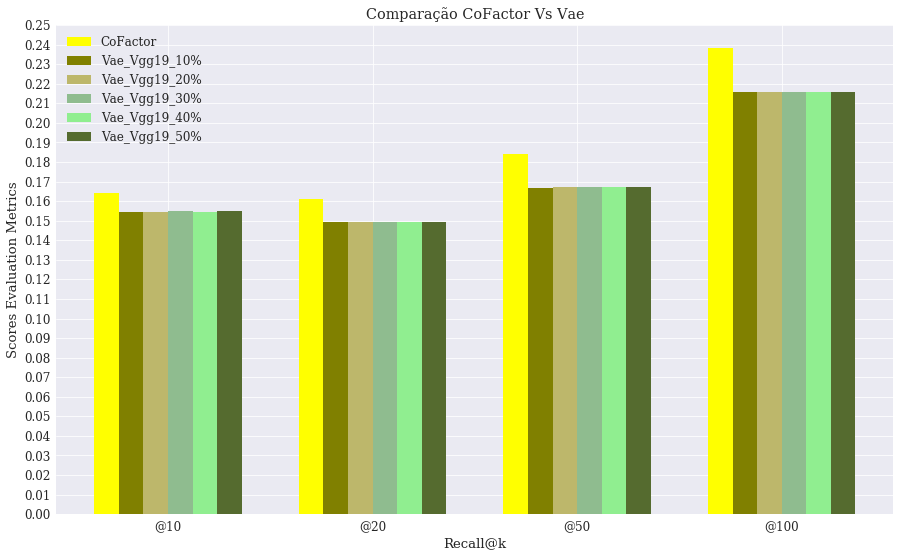

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1544  0.1492  0.1669  0.2157
20%       0.1546  0.1492  0.1671  0.2155
30%       0.1547  0.1492  0.1671  0.2156
40%       0.1545  0.1493  0.1670  0.2156
50%       0.1547  0.1492  0.1670  0.2157





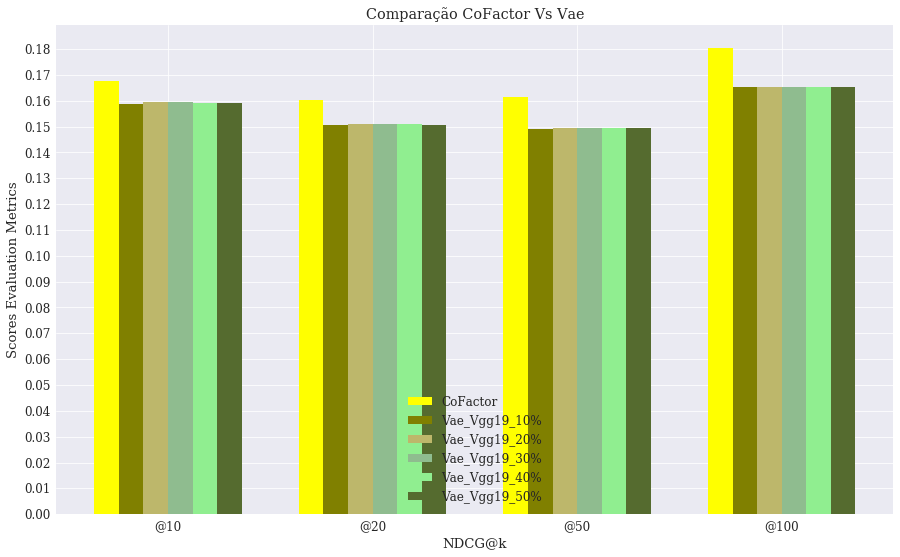

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1589  0.1505  0.1492  0.1652
20%       0.1594  0.1508  0.1495  0.1653
30%       0.1595  0.1509  0.1495  0.1654
40%       0.1592  0.1508  0.1494  0.1653
50%       0.1593  0.1507  0.1493  0.1653





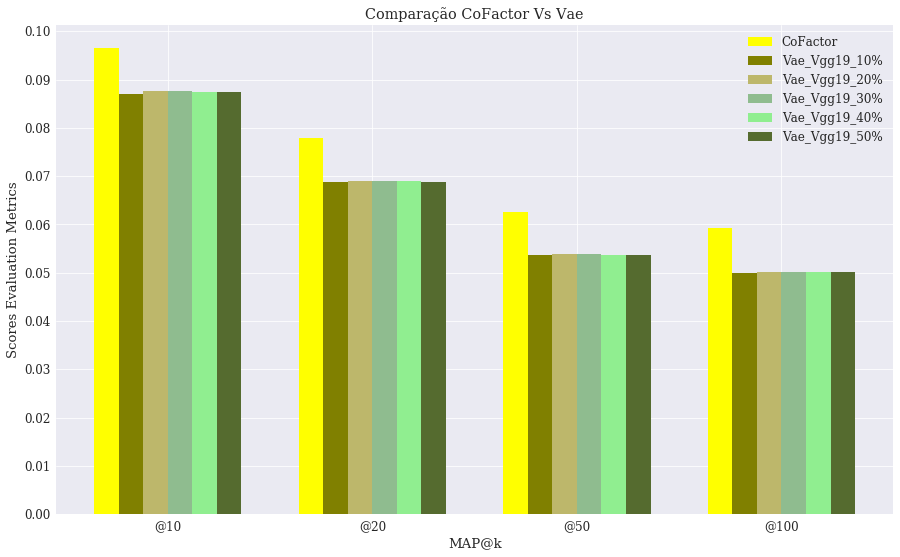

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0871  0.0688  0.0536  0.0500
20%       0.0876  0.0690  0.0538  0.0501
30%       0.0876  0.0691  0.0538  0.0501
40%       0.0874  0.0690  0.0537  0.0501
50%       0.0875  0.0689  0.0537  0.0501


In [15]:
list_file_name = ['vae_vgg19_10_pct_rec_val'
                  , 'vae_vgg19_20_pct_rec_val'
                  , 'vae_vgg19_30_pct_rec_val'
                  , 'vae_vgg19_40_pct_rec_val'
                  , 'vae_vgg19_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

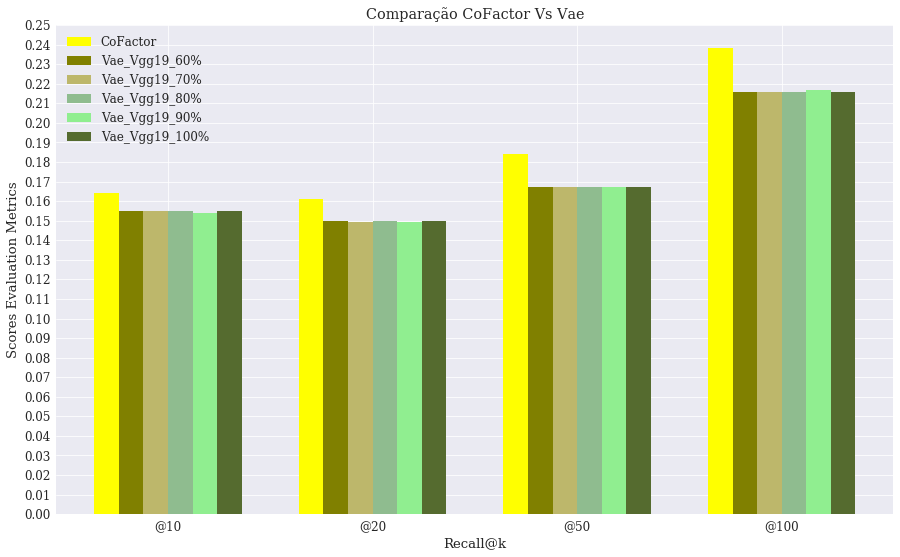

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1547  0.1496  0.1670  0.2156
70%       0.1547  0.1494  0.1672  0.2157
80%       0.1550  0.1496  0.1671  0.2159
90%       0.1541  0.1495  0.1671  0.2170
100%      0.1549  0.1496  0.1671  0.2158





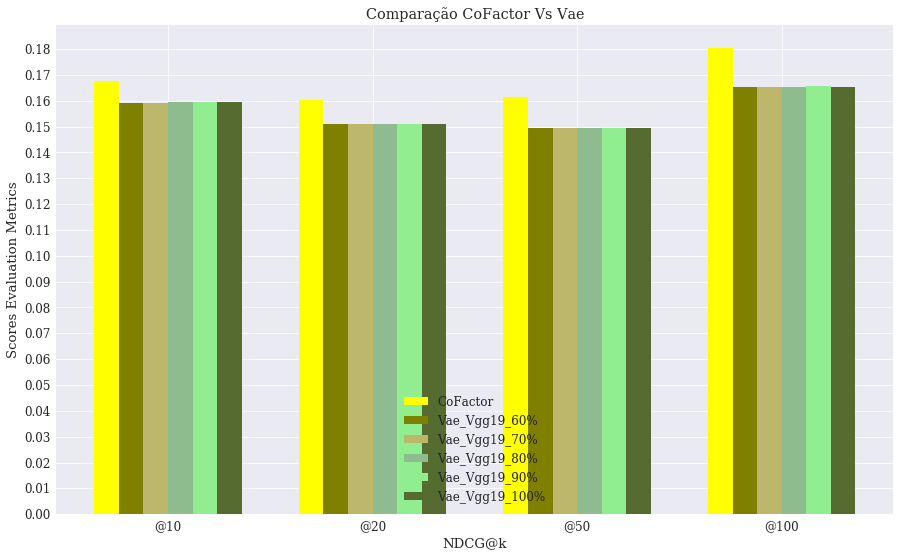

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1593  0.1510  0.1495  0.1654
70%       0.1592  0.1508  0.1495  0.1654
80%       0.1596  0.1510  0.1495  0.1655
90%       0.1596  0.1511  0.1494  0.1658
100%      0.1594  0.1509  0.1495  0.1654





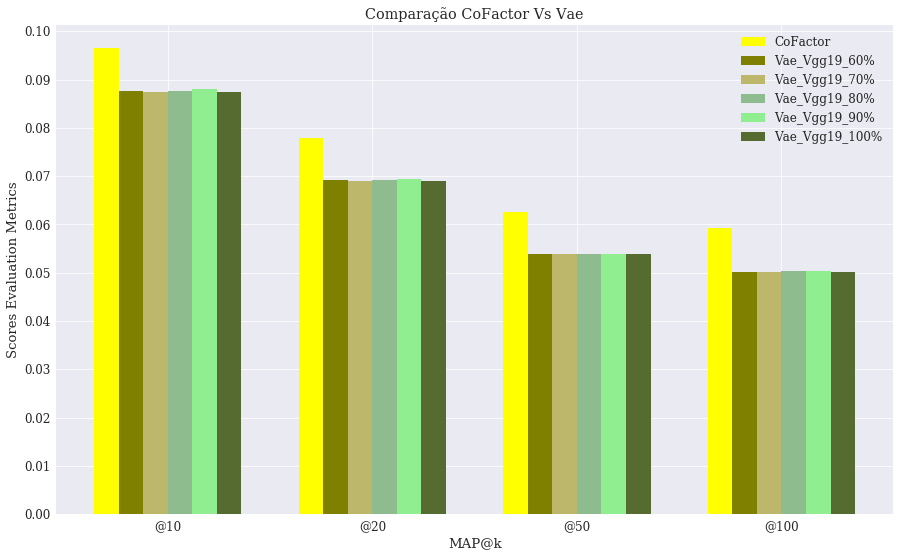

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0876  0.0692  0.0539  0.0502
70%       0.0874  0.0690  0.0538  0.0502
80%       0.0877  0.0692  0.0539  0.0503
90%       0.0881  0.0694  0.0538  0.0503
100%      0.0875  0.0691  0.0538  0.0502


In [16]:
list_file_name = ['vae_vgg19_60_pct_rec_val'
                  , 'vae_vgg19_70_pct_rec_val'
                  , 'vae_vgg19_80_pct_rec_val'
                  , 'vae_vgg19_90_pct_rec_val'
                  , 'vae_vgg19_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Xception

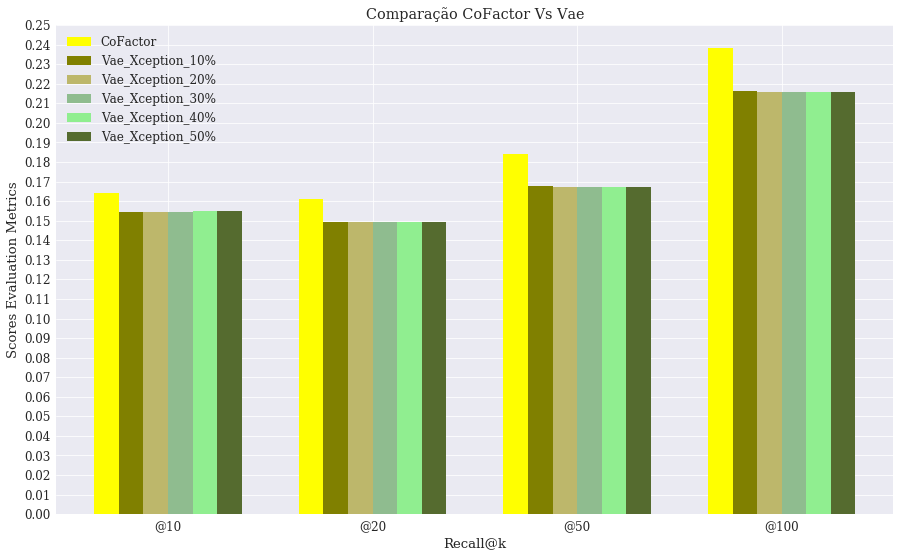

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1543  0.1491  0.1675  0.2163
20%       0.1546  0.1495  0.1671  0.2160
30%       0.1545  0.1495  0.1673  0.2158
40%       0.1549  0.1493  0.1673  0.2158
50%       0.1550  0.1493  0.1673  0.2157





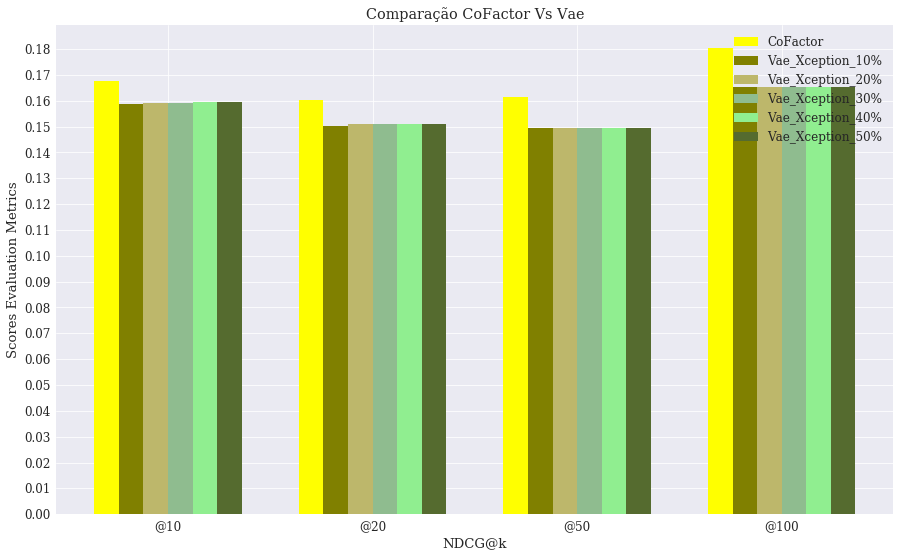

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1586  0.1503  0.1493  0.1653
20%       0.1593  0.1510  0.1495  0.1655
30%       0.1593  0.1509  0.1495  0.1654
40%       0.1595  0.1509  0.1496  0.1655
50%       0.1596  0.1508  0.1496  0.1653





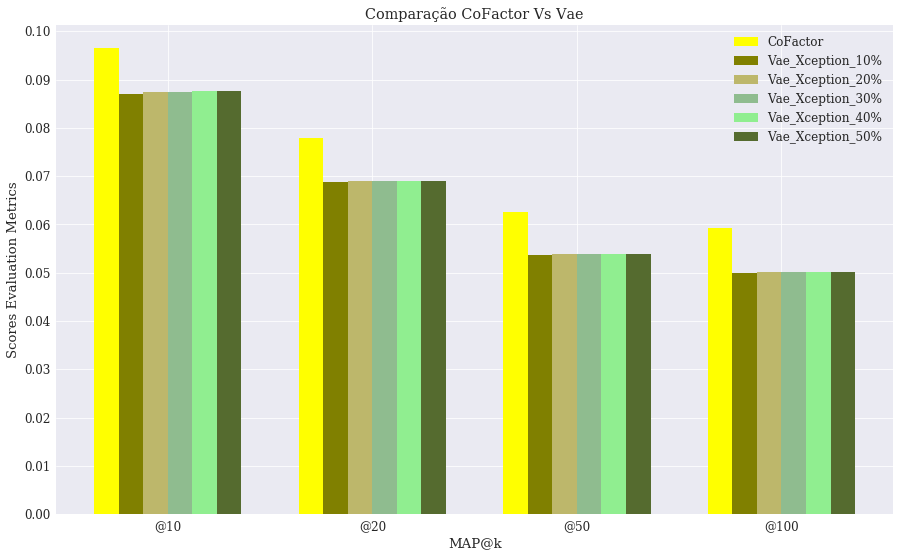

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0870  0.0687  0.0536  0.0500
20%       0.0874  0.0691  0.0538  0.0502
30%       0.0875  0.0691  0.0538  0.0501
40%       0.0876  0.0691  0.0538  0.0501
50%       0.0876  0.0691  0.0538  0.0501


In [17]:
list_file_name = ['vae_xception_10_pct_rec_val'
                  , 'vae_xception_20_pct_rec_val'
                  , 'vae_xception_30_pct_rec_val'
                  , 'vae_xception_40_pct_rec_val'
                  , 'vae_xception_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

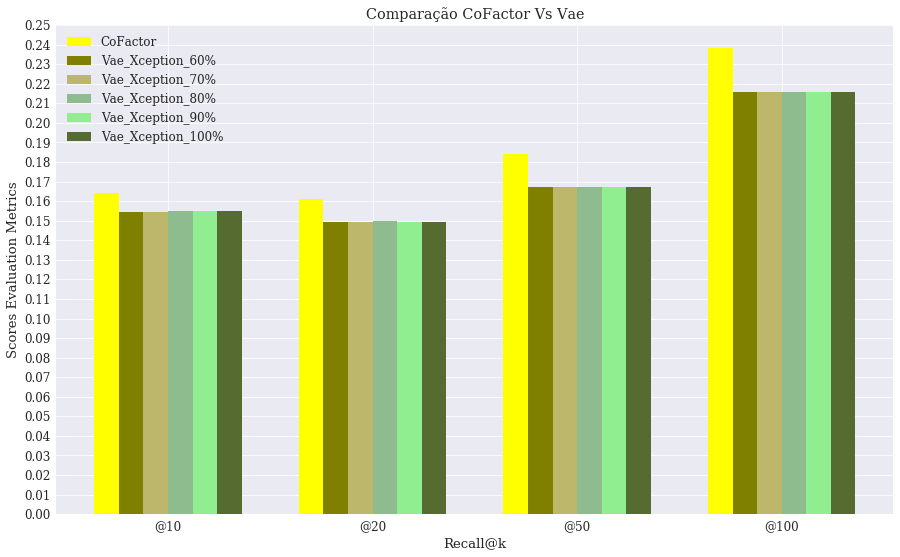

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1546  0.1493  0.1672  0.2159
70%       0.1546  0.1491  0.1673  0.2156
80%       0.1547  0.1496  0.1674  0.2157
90%       0.1548  0.1493  0.1672  0.2157
100%      0.1547  0.1492  0.1672  0.2156





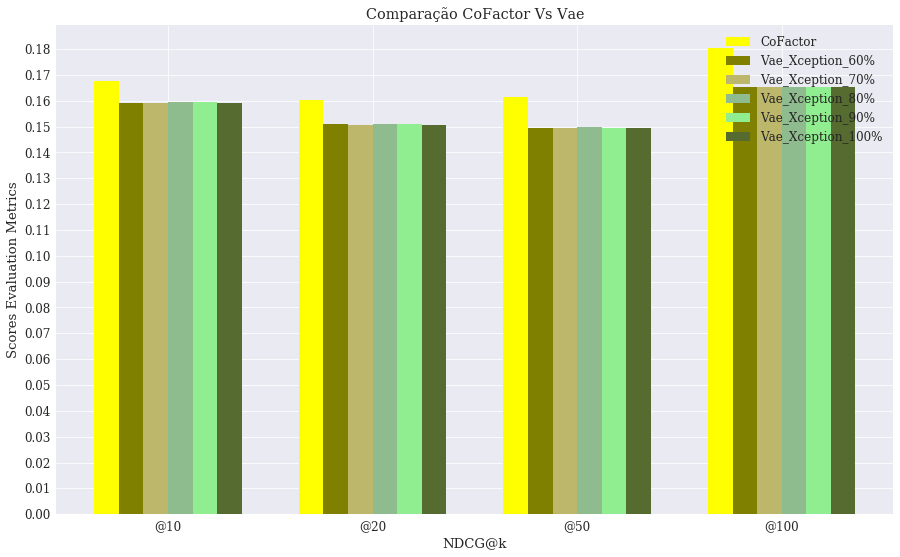

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1593  0.1508  0.1495  0.1654
70%       0.1590  0.1505  0.1494  0.1652
80%       0.1595  0.1511  0.1497  0.1655
90%       0.1596  0.1509  0.1496  0.1655
100%      0.1592  0.1507  0.1494  0.1653





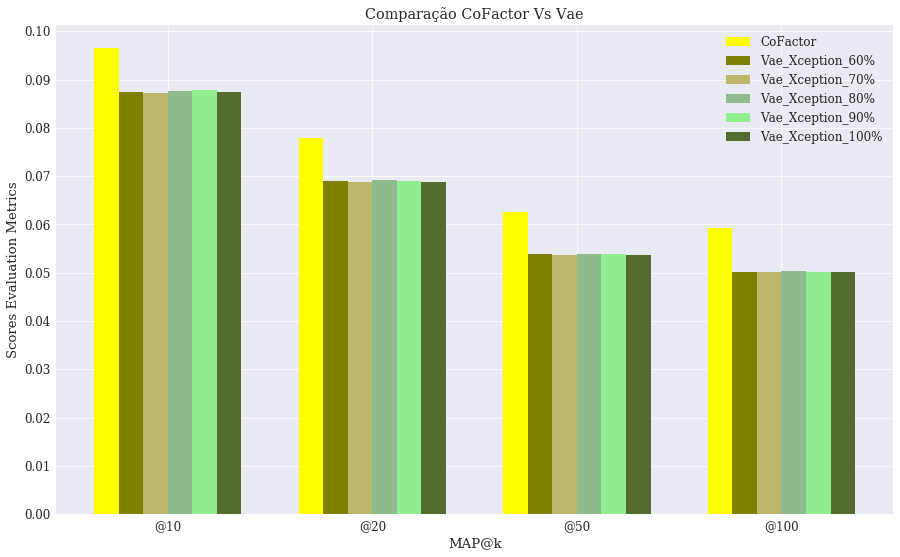

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0874  0.0690  0.0538  0.0501
70%       0.0872  0.0689  0.0537  0.0501
80%       0.0877  0.0692  0.0539  0.0503
90%       0.0878  0.0691  0.0539  0.0502
100%      0.0874  0.0689  0.0537  0.0501


In [18]:
list_file_name = ['vae_xception_60_pct_rec_val'
                  , 'vae_xception_70_pct_rec_val'
                  , 'vae_xception_80_pct_rec_val'
                  , 'vae_xception_90_pct_rec_val'
                  , 'vae_xception_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)
